In [1]:
# matplotlib API入门
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline

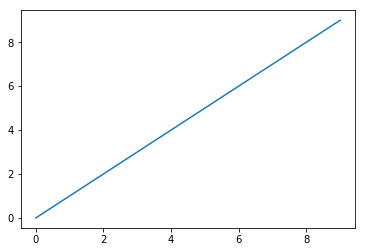

In [2]:
plt.plot(np.arange(10))

In [3]:
# Figure和Subplot

In [4]:
fig = plt.figure()

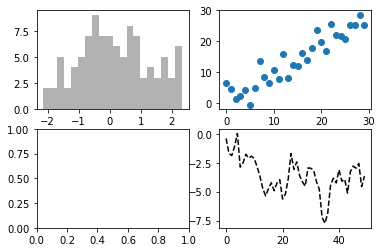

In [5]:
ax_1 = plt.subplot(2,2,1) # 绘图板2行2列，选取第1个。先行再列这么数。
ax_1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) # 直方图
ax_2 = plt.subplot(2,2,2)
ax_2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30)) # 散点图
ax_3 = plt.subplot(2,2,3)
ax_4 = plt.subplot(2,2,4)
plt.plot(np.random.randn(50).cumsum(), 'k--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019158D4F710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001915954C7B8>]], dtype=object)

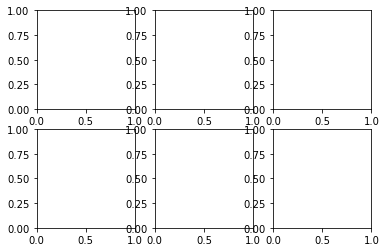

In [6]:
fig, axes = plt.subplots(2, 3) # 2行3列的布局
axes

In [7]:
# subplots的选项
# nrows：    subplots的行数
# ncols：    subplots的列数
# sharex：   所有subplots应该使用相同的X轴刻度（调节xlim将会影响所有subplot）
# sharey：   所有subplots应该使用相同的Y轴刻度（调节ylim将会影响所有subplot）
# subplotkw：创建subplot的关键字字典
# **fig_kw： 创建figure时的关键字，比如figsize=(8, 6)

In [8]:
# 调整subplot周围的间距

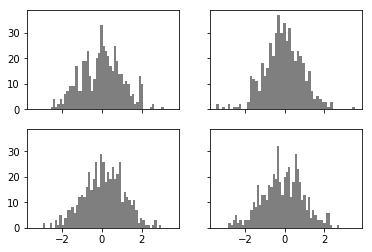

In [9]:
plt.subplots_adjust(left=None,
                    bottom=1,
                    right=2,
                    top=3,
                    wspace=4,
                    hspace=5) # 可以自行调整参数查看效果
# plt.subplots_adjust(wspace=0, hspace=0) # 可以只设置某几个参数
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

In [10]:
# 颜色、标记和线型

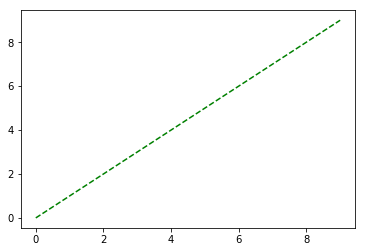

In [11]:
x = np.arange(10)
y = np.arange(10)
plt.plot(x, y, 'g--')

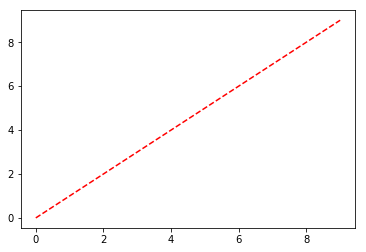

In [12]:
plt.plot(x, y, linestyle='--', color='r') # 线形和颜色

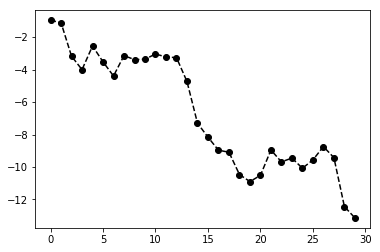

In [13]:
plt.plot(np.random.randn(30).cumsum(), 'ko--') # 颜色-标记-线形
# plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

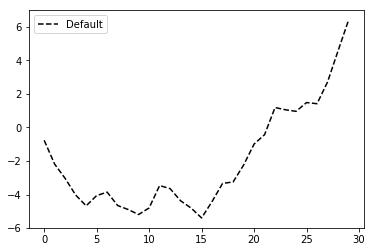

In [14]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default') # 使用默认线性插值
plt.legend(loc='best')

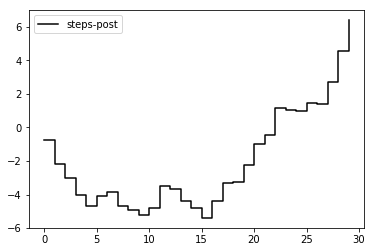

In [15]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post') # 使用阶梯方法绘制图形
plt.legend(loc='best')

In [16]:
# 刻度、标签和图例

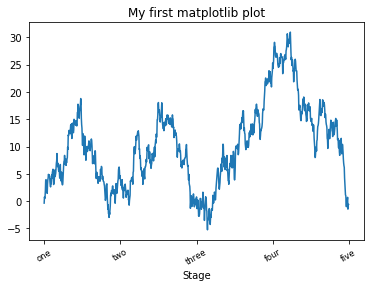

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) # 设置X轴刻度
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30,
                            fontsize='small') # X轴标签，数组与刻度数组大小对应
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stage') # X轴命名

In [18]:
# 添加图例

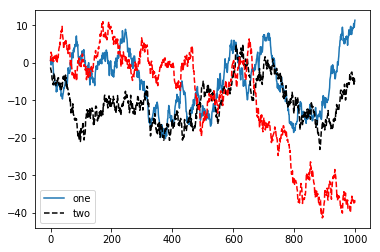

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k--', color='r', label='_nolegend') # _nolegend不显示图例
ax.legend(loc='best') # loc控制图例显示位置

In [20]:
# 注解以及在Subplot上绘图

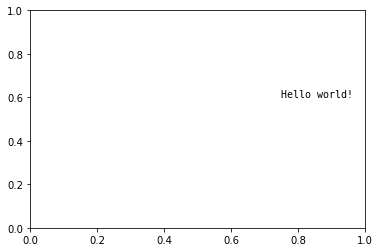

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.text(0.75, 0.6, # 相对坐标轴的比例
        'Hello world!',
        family='monospace',
        fontsize=10) # 放置标注文本

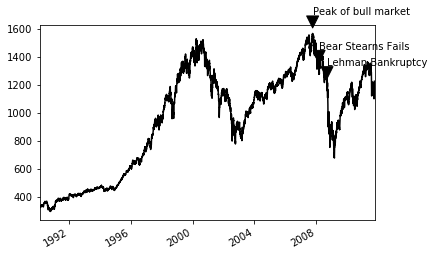

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('../data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-') # 直接调用pandas的绘图功能
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')] # 几次大危机
for date, label in crisis_data:
    ax.annotate(label, # 文本
                xy=(date, spx.asof(date) + 50), # 要标注的点，这里asof和直接下标访问没区别。
                xytext=(date, spx.asof(date) + 200), # 标志文本坐标
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', # 放在左上角
                verticalalignment='top')

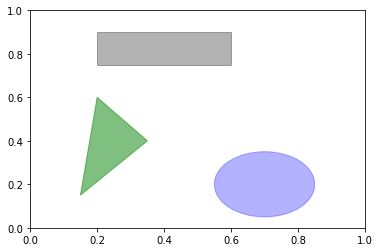

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [24]:
# 将图表保存到文件

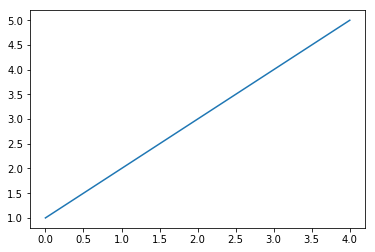

In [25]:
fig = plt.figure()
plt.plot([1, 2, 3, 4, 5])
plt.savefig('sample.png', dpi=400, bbox_inches='tight') # dpi为分辨率（每英寸点数）

In [26]:
# 也可以写到buffer对象
# from io import StringIO
# buffer = StringIO()
# plt.savefig(buffer)
# plot_data = buffer.getvalue()

In [27]:
# savefig的选项：      
# fname：              含有文件路径的字符串或Python的文件类型对象。
#                      图像格式由文件扩展名推断得出。
# dpi
# facecolor/edgecolor：图像背景色，默认为'w'（白色）
# format
# bbox_inches：        图像需要保存的部分。
#                      如果设置为'tight'，则将尝试剪除图表周围的空白部分。

In [28]:
# matplotlib配置（太少用到了，自己查书吧...）